In [1]:
import pandas as pd
from pathlib import Path
import json

df = pd.DataFrame(columns=["filename", "title", "text", "metadata"])

idx = 0
for path in Path("../pdf-reports/plaintext").iterdir():
    if path.suffix == '.json':
        with path.open() as json_file:
            parsed = json.load(json_file)
            filename = path.stem
            
            # Some documents do not have title among metadata.
            title = parsed["metadata"]["title"] if "title" in parsed["metadata"].keys() else filename
            
            df.loc[idx] = [filename, title, parsed["content"], parsed["metadata"]]
            idx += 1

df.head()

,filename,title,text,metadata
0,8th-enisa-workshop-certs-in-europe-report,8th ENISA Workshop ‘CERTs in Europe’,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{'meta:save-date': '2014-01-10T16:07:35Z', 'dc..."
1,a-collection-of-good-practice-for-cert-quality...,,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{'meta:save-date': '2009-06-22T13:09:55Z', 'pd..."
2,a-security-analysis-of-next-generation-web-sta...,a-security-analysis-of-next-generation-web-sta...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{'meta:save-date': '2011-08-02T13:37:24Z', 'pd..."
3,actionable-information-for-security,actionable-information-for-security,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"{'meta:save-date': '2015-01-19T07:28:32Z', 'pd..."
4,algorithms-key-size-and-parameters-report-2014,algorithms-key-size-and-parameters-report-2014,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,{'pdf:docinfo:creator_tool': 'Adobe Acrobat Pr...


In [2]:
import re

def remove_url(s):
    return re.sub(r'http\S+', '', s, flags=re.MULTILINE)

print(remove_url("Hello https://a72d304c643b011e8b84c061e85c3662-550367788.eu-west-3.elb.amazonaws.com/ world!"))

Hello  world!


In [3]:
import re

def strip_tags(s):
    """Basic regexp based HTML / XML tag stripper function
    For serious HTML/XML preprocessing you should rather use an external
    library such as lxml or BeautifulSoup.
    """
    s = re.compile(r"<([^>]+)>", flags=re.UNICODE).sub(" ", s)
    #s = re.compile(r"\&\w+\;").sub(" ", s)
    s = re.compile(r"\&[^ ]+\;").sub(" ", s)
    return s

print(strip_tags("<p>Hello &nbsp; &#039; world!</p>"))

 Hello     world! 


In [4]:
#import nltk
#nltk.download()

In [5]:
#from nltk import word_tokenize          
#from nltk.stem.porter import PorterStemmer 

#ps = PorterStemmer()

#def porter(text):
#    return [ps.stem(w).lower() for w in word_tokenize(text) if w.isalpha() and len(w)>1]

In [6]:
#from nltk.corpus import stopwords

#print(stopwords.words('english'))

In [7]:
from sklearn.feature_extraction import stop_words
 
print(stop_words.ENGLISH_STOP_WORDS)

frozenset({'take', 'nor', 'become', 'co', 'empty', 'afterwards', 'no', 'see', 'same', 'almost', 'these', 'thin', 'through', 'forty', 'whoever', 'might', 'becomes', 'we', 'whose', 'thru', 'against', 'well', 'be', 'none', 'put', 'throughout', 'seems', 'among', 'thence', 'already', 'top', 'via', 'alone', 'whereafter', 'another', 'your', 'others', 'both', 'herself', 'any', 'the', 'anyone', 'whither', 'front', 'it', 'about', 'all', 'he', 'ever', 'who', 'nothing', 'over', 'fifty', 'why', 'eleven', 'some', 'during', 'meanwhile', 'often', 'fire', 'such', 'least', 'somewhere', 'former', 'latterly', 'whence', 'side', 'amount', 'anything', 'per', 'sixty', 'but', 'into', 'what', 'has', 'where', 'between', 'much', 'un', 'hasnt', 'show', 'describe', 'will', 'thick', 'very', 'himself', 'mill', 'myself', 'however', 'in', 'must', 'them', 'call', 'only', 'behind', 'under', 'within', 'always', 'our', 'nowhere', 'either', 'can', 'fill', 'someone', 'while', 'becoming', 'few', 'nine', 'otherwise', 're', 'th

In [8]:
def preproc(s):
    return strip_tags(remove_url(s)).lower()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(preprocessor=preproc, stop_words='english')
#                     tokenizer=porter)
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=<function preproc at 0x10e34ec80>,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [10]:
from time import time

t0 = time()
bw = cv.fit_transform(df['text'])
print("done in %0.3fs." % (time() - t0))
bw

done in 7.324s.


<351x148988 sparse matrix of type '<class 'numpy.int64'>'
	with 778972 stored elements in Compressed Sparse Row format>

In [11]:
import numpy as np

freq_pairs = list(zip(cv.get_feature_names(), np.asarray(bw.mean(axis=0)).ravel()))
sorted(freq_pairs, key = lambda x: x[1], reverse=True)[:100]

[('security', 138.43589743589746),
 ('information', 106.00854700854697),
 ('data', 89.094017094017218),
 ('enisa', 50.119658119658155),
 ('services', 41.088319088319068),
 ('network', 39.985754985755001),
 ('csirt', 39.333333333333357),
 ('service', 37.515669515669494),
 ('cyber', 36.555555555555628),
 ('systems', 34.310541310541304),
 ('management', 33.800569800569789),
 ('national', 32.45014245014243),
 ('eu', 32.105413105413078),
 ('cert', 31.361823361823372),
 ('use', 31.207977207977184),
 ('european', 31.094017094017055),
 ('risk', 29.877492877492852),
 ('incident', 28.444444444444439),
 ('level', 27.227920227920208),
 ('protection', 25.495726495726462),
 ('used', 25.413105413105384),
 ('privacy', 25.128205128205128),
 ('public', 22.723646723646702),
 ('report', 22.646723646723611),
 ('la', 21.746438746438741),
 ('time', 21.584045584045569),
 ('threat', 21.532763532763529),
 ('based', 20.757834757834708),
 ('trust', 20.26495726495726),
 ('en', 19.985754985754966),
 ('control', 19.

In [12]:
cv2 = CountVectorizer(ngram_range=(2, 2), preprocessor=preproc, stop_words='english')
cv2

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=<function preproc at 0x10e34ec80>,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [13]:
t0 = time()
bw2 = cv2.fit_transform(df['text'])
print("done in %0.3fs." % (time() - t0))
bw2

done in 22.080s.


<351x1642288 sparse matrix of type '<class 'numpy.int64'>'
	with 2593852 stored elements in Compressed Sparse Row format>

In [14]:
freq_pairs = list(zip(cv2.get_feature_names(), np.asarray(bw2.mean(axis=0)).ravel()))
sorted(freq_pairs, key = lambda x: x[1], reverse=True)[:100]

[('information security', 21.353276353276332),
 ('cyber security', 18.04558404558404),
 ('member states', 13.333333333333314),
 ('personal data', 11.777777777777775),
 ('network information', 10.769230769230751),
 ('data protection', 10.541310541310539),
 ('good practice', 7.4757834757834924),
 ('information sharing', 7.1851851851851913),
 ('security measures', 7.0227920227920269),
 ('service providers', 6.9686609686609637),
 ('cert d1', 6.430199430199429),
 ('risk management', 6.4045584045584043),
 ('d1 d2', 6.3732193732193752),
 ('europa eu', 6.3190883190883103),
 ('trust service', 6.0911680911680914),
 ('good practices', 5.9943019943019964),
 ('enisa europa', 5.9601139601139472),
 ('risk assessment', 5.7179487179487154),
 ('wp2006 cert', 5.5099715099715096),
 ('european union', 5.3076923076923022),
 ('smart grid', 4.814814814814814),
 ('national governmental', 4.7207977207977185),
 ('trust services', 4.7008547008546993),
 ('eu member', 4.5925925925925855),
 ('threat landscape', 4.57

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate_from_frequencies(dict(freq_pairs));

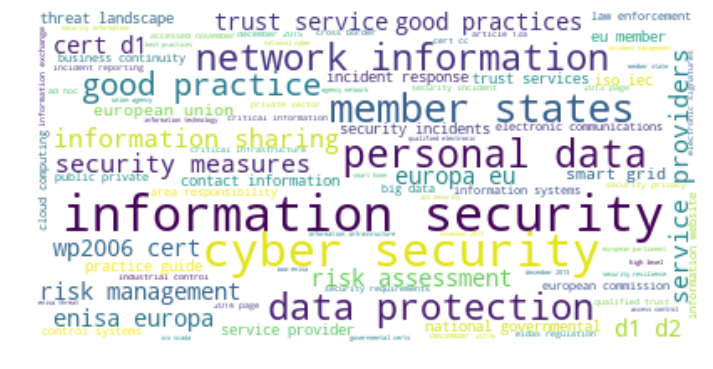

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()